In [2]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io
import datetime 


In [3]:
df = pd.DataFrame()
df = pd.read_csv('LoanStats_Validated.csv',delimiter=',')

In [6]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,file_name,time_stamp
0,10119623,11971241.0,12000.0,12000.0,12000.0,36,11.99,398.52,B,B3,...,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0,/LoanStats3b,2017-04-05 12:34:57
1,10224583,12086734.0,11100.0,11100.0,11100.0,36,14.98,384.68,C,C3,...,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,/LoanStats3b,2017-04-05 12:34:57
2,10159584,12011200.0,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,...,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0,/LoanStats3b,2017-04-05 12:34:57
3,10139658,11991209.0,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,...,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0,/LoanStats3b,2017-04-05 12:34:57
4,10149566,12001108.0,8000.0,8000.0,8000.0,36,10.99,261.88,B,B2,...,100.0,75.0,1.0,0.0,33226.0,15949.0,8200.0,12426.0,/LoanStats3b,2017-04-05 12:34:57
5,10119590,11971211.0,11500.0,11500.0,11500.0,60,22.90,323.54,E,E4,...,100.0,50.0,0.0,0.0,30891.0,24724.0,9000.0,16791.0,/LoanStats3b,2017-04-05 12:34:57
6,10127816,11979581.0,24000.0,24000.0,24000.0,36,13.53,814.80,B,B5,...,100.0,75.0,0.0,0.0,229072.0,61397.0,21500.0,58847.0,/LoanStats3b,2017-04-05 12:34:57
7,10148818,12000415.0,15000.0,15000.0,15000.0,36,14.47,516.10,C,C2,...,100.0,7.7,0.0,0.0,33300.0,13038.0,20800.0,7500.0,/LoanStats3b,2017-04-05 12:34:57
8,10159611,12011228.0,10000.0,10000.0,10000.0,36,9.67,321.13,B,B1,...,77.3,66.7,0.0,0.0,58486.0,39143.0,9200.0,36186.0,/LoanStats3b,2017-04-05 12:34:57
9,10129506,11981122.0,20800.0,20800.0,20800.0,36,13.53,706.16,B,B5,...,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0,/LoanStats3b,2017-04-05 12:34:57


In [7]:
df2 = pd.DataFrame()
df2 = df.groupby( [ "grade"] ).size().to_frame(name = 'count').reset_index()
df2

,grade,count
0,A,218954
1,B,388709
2,C,377428
3,D,198040
4,E,95978
5,F,32136
6,G,7846


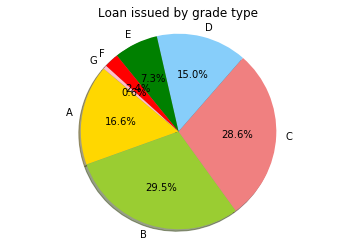

In [8]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = df2['grade']
sizes = df2['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','red','pink']
#explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan issued by grade type') 
plt.axis('equal')
plt.show()

In [9]:
df2= pd.DataFrame()
df2 = df.groupby('grade',as_index=False)['dti'].mean()
df2

,grade,dti
0,A,15.857722
1,B,18.049705
2,C,19.593815
3,D,20.725988
4,E,21.277356
5,F,21.872842
6,G,22.207044


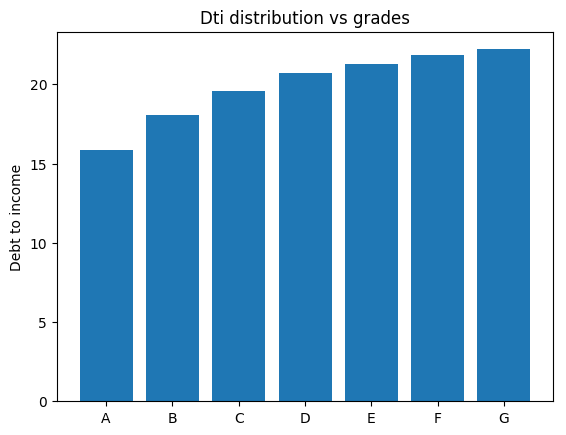

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df2['grade']
y_pos = np.arange(len(objects))
performance = df2['dti']
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Debt to income')
plt.title('Dti distribution vs grades')
 
plt.show()

In [88]:
df2= pd.DataFrame()
df2 = df3.groupby('grade',as_index=False)['loan_status_bol'].mean()


df2['Defaulted Loans'] = (1-df2['loan_status_bol'])
df2

,grade,loan_status_bol,Defaulted Loans
0,A,0.929996,0.070004
1,B,0.863151,0.136849
2,C,0.775223,0.224777
3,D,0.703110,0.296890
4,E,0.625734,0.374266
5,F,0.573773,0.426227
6,G,0.533968,0.466032


LOAN PAID VS DEFAULTED LOANS WRT GRADE

Populating the interactive namespace from numpy and matplotlib


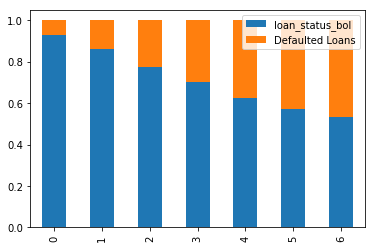

In [89]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt



df2[['loan_status_bol','Defaulted Loans']].plot(kind='bar', stacked=True)

CHOSE SPECIFIC COLUMNS FOR ANALYSIS

In [57]:
df3 = pd.DataFrame()
df3 = df[['funded_amnt','emp_length','annual_inc','loan_status','home_ownership','addr_state','grade','dti','int_rate']]
df3.head(5)

,funded_amnt,emp_length,annual_inc,loan_status,home_ownership,addr_state,grade,dti,int_rate
0,12000.0,10+ years,130000.0,Fully Paid,MORTGAGE,CO,B,13.03,11.99
1,11100.0,10+ years,90000.0,Fully Paid,MORTGAGE,NY,C,3.73,14.98
2,9750.0,1 year,26000.0,Fully Paid,RENT,CA,C,25.12,13.98
3,12000.0,10+ years,40000.0,Fully Paid,RENT,NM,B,16.94,13.53
4,8000.0,2 years,33000.0,Charged Off,MORTGAGE,CO,B,15.75,10.99


CLEAN SOME OF THE COLUMNS AGAIN FOR ANALYSIS

In [59]:
df3['loan_status_bol'] = df3['loan_status'].map({'Current': 2, 'Fully Paid': 1, 'Charged Off':0, 'Late(31-120 days)':0, 'In Grace Period': 0, 'Late(16-30 days)': 0, 'Default': 0})
df3 = df3[df3.loan_status_bol != 2] 
df3["loan_status_bol"] = df3["loan_status_bol"].apply(lambda loan_status_bol: 0 if loan_status_bol == 0 else 1)

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [111]:
df3['emp_length_clean'] = df3.emp_length.str.replace('+','')
df3['emp_length_clean'] = df3.emp_length_clean.str.replace('<','')
df3['emp_length_clean'] = df3.emp_length_clean.str.replace('years','')
df3['emp_length_clean'] = df3.emp_length_clean.str.replace('year','')
df3['emp_length_clean'] = df3.emp_length_clean.str.replace('n/a','0')

df3['emp_length_clean']=pd.to_numeric(df3['emp_length_clean'], errors='ignore')

df3.head(5)

,funded_amnt,emp_length,annual_inc,loan_status,home_ownership,addr_state,grade,dti,int_rate,loan_status_bol,emp_length_clean
0,12000.0,10+ years,130000.0,Fully Paid,MORTGAGE,CO,B,13.03,11.99,1,10
1,11100.0,10+ years,90000.0,Fully Paid,MORTGAGE,NY,C,3.73,14.98,1,10
2,9750.0,1 year,26000.0,Fully Paid,RENT,CA,C,25.12,13.98,1,1
3,12000.0,10+ years,40000.0,Fully Paid,RENT,NM,B,16.94,13.53,1,10
4,8000.0,2 years,33000.0,Charged Off,MORTGAGE,CO,B,15.75,10.99,0,2


In [116]:
df2= pd.DataFrame()
df2 = df3.groupby('emp_length_clean',as_index=False)['loan_status_bol','int_rate','dti','annual_inc'].mean()
#df2.drop(0, inplace = True)

df2

,emp_length_clean,loan_status_bol,int_rate,dti,annual_inc
0,0,0.723133,13.826238,21.556538,49531.513374
1,1,0.785696,13.610174,17.102927,69865.103878
2,2,0.794308,13.649883,17.226457,72244.474305
3,3,0.793618,13.667244,17.279100,72946.199255
4,4,0.796063,13.660880,17.340202,72873.873051
5,5,0.797463,13.696720,17.379388,73859.271832
6,6,0.797799,13.787722,17.458695,73871.060448
7,7,0.794898,13.841167,17.568714,74400.545908
8,8,0.788313,13.758718,17.833179,75899.355100
9,9,0.787316,13.772024,17.959030,75930.543760


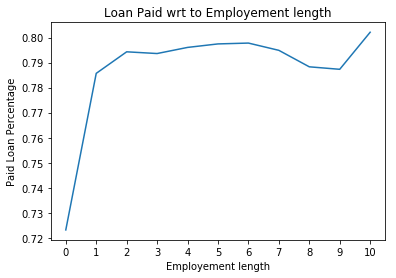

In [117]:
import matplotlib.pyplot as plt
from matplotlib import style
x = df2['emp_length_clean']
y = df2['loan_status_bol']
x1 = x.astype(float)
y1 = y.astype(float)
plt.plot(x1,y1)



plt.xlabel('Employement length')
plt.ylabel('Paid Loan Percentage')
plt.title('Loan Paid wrt to Employement length')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))


plt.show()

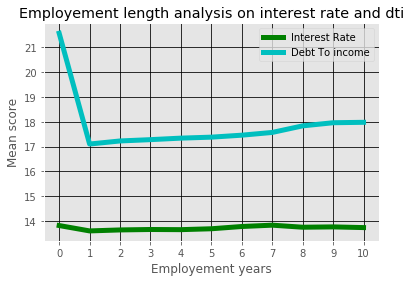

In [118]:
from matplotlib import pyplot as plt
from matplotlib import style
#rcParams['figure.figsize']=10,5

style.use('ggplot')

x = df2['emp_length_clean']
y = df2['int_rate']

x2 = df2['emp_length_clean']
y2 = df2['dti']



plt.plot(x,y,'g',label='Interest Rate', linewidth=5)
plt.plot(x2,y2,'c',label='Debt To income',linewidth=5)


plt.title('Employement length analysis on interest rate and dti')
plt.ylabel('Mean score')
plt.xlabel('Employement years')

plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.grid(True,color='k')

plt.show()

In [76]:
df2= pd.DataFrame()
df2 = df3.groupby('home_ownership',as_index=False)['loan_status_bol'].mean()
df2.drop(0, inplace = True)
df2.drop(2, inplace = True)
df2

df2['Defaulted Loans'] = (1-df2['loan_status_bol'])
df2

,home_ownership,loan_status_bol,Defaulted Loans
1,MORTGAGE,0.817734,0.182266
3,OTHER,0.809859,0.190141
4,OWN,0.782657,0.217343
5,RENT,0.762721,0.237279


PAID LOANS VS DEFAULTED WRT TO HOME OWNERSHIP

Populating the interactive namespace from numpy and matplotlib


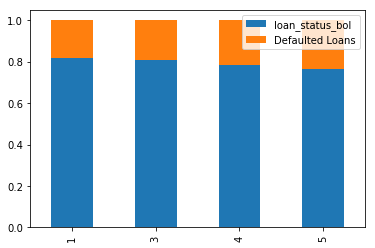

In [80]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt



df2[['loan_status_bol','Defaulted Loans']].plot(kind='bar', stacked=True)

In [85]:
df2= pd.DataFrame()
df2 = df.groupby('home_ownership',as_index=False)['dti','int_rate','annual_inc','funded_amnt'].mean()
df2.drop(0, inplace = True)
df2.drop(2, inplace = True)
df2

,home_ownership,dti,int_rate,annual_inc,funded_amnt
1,MORTGAGE,19.019988,12.865507,86627.829152,16366.847073
3,OTHER,14.344167,13.150417,68374.180556,11368.750000
4,OWN,19.271468,13.182767,71657.767393,14186.082864
5,RENT,18.607262,13.564653,65189.467097,12890.978558


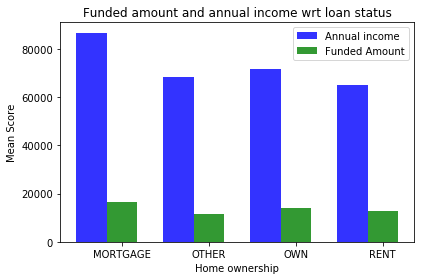

In [87]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
performance = df2['annual_inc']
performance2 = df2['funded_amnt']
index = df2['home_ownership']

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, performance, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Annual income')
 
rects2 = plt.bar(index + bar_width, performance2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Funded Amount')
 
plt.xlabel('Home ownership')
plt.ylabel('Mean Score')
plt.title('Funded amount and annual income wrt loan status')
plt.xticks(index + bar_width, ('MORTGAGE','OTHER','OWN','RENT',))
plt.legend()
 
plt.tight_layout()
plt.show()

In [12]:
df3 = pd.DataFrame()
df3 = df['loan_status'].value_counts()
df3

Current               732247
Fully Paid            441660
Charged Off           111739
Late (31-120 days)     18848
In Grace Period        10297
Late (16-30 days)       4274
Default                   26
Name: loan_status, dtype: int64

In [13]:
df3 = pd.DataFrame()
df3 = df.groupby( [ "loan_status"] ).size().to_frame(name = 'count').reset_index()
df3

,loan_status,count
0,Charged Off,111739
1,Current,732247
2,Default,26
3,Fully Paid,441660
4,In Grace Period,10297
5,Late (16-30 days),4274
6,Late (31-120 days),18848


In [14]:
df2= pd.DataFrame()
df2 = df.groupby('loan_status',as_index=False)['dti','int_rate'].mean()
df2

,loan_status,dti,int_rate
0,Charged Off,19.858233,15.843601
1,Current,19.776826,12.746836
2,Default,20.235385,15.168462
3,Fully Paid,16.977839,13.049785
4,In Grace Period,20.904299,15.160647
5,Late (16-30 days),22.421219,15.316642
6,Late (31-120 days),21.053939,15.517112


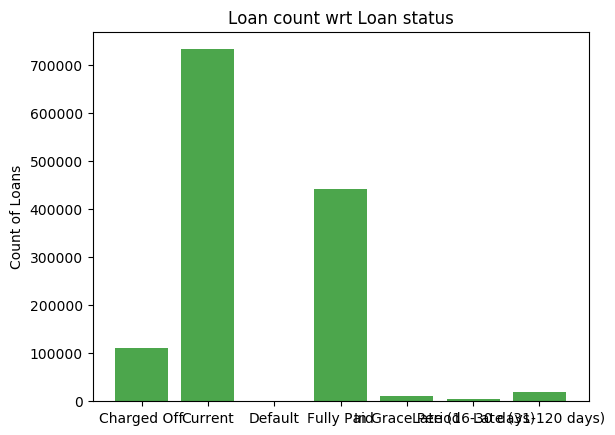

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df3['loan_status']
y_pos = np.arange(len(objects))
performance = df3['count']

 
plt.bar(y_pos, performance, color='g', align='center', alpha=0.7)

plt.xticks(y_pos, objects)
plt.ylabel('Count of Loans')
plt.title('Loan count wrt Loan status')
 
plt.show()

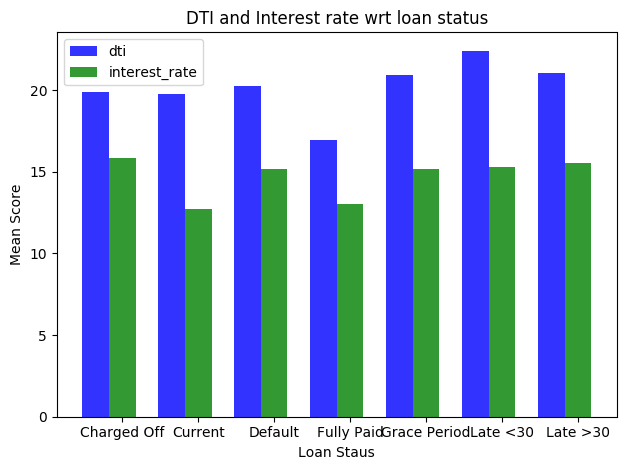

In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 7
performance = df2['dti']
performance2 = df2['int_rate']
index = df2['loan_status']

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, performance, bar_width,
                 alpha=opacity,
                 color='b',
                 label='dti')
 
rects2 = plt.bar(index + bar_width, performance2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='interest_rate')
 
plt.xlabel('Loan Staus')
plt.ylabel('Mean Score')
plt.title('DTI and Interest rate wrt loan status')
plt.xticks(index + bar_width, ('Charged Off','Current','Default','Fully Paid','Grace Period','Late <30', 'Late >30'))
plt.legend()
 
plt.tight_layout()
plt.show()

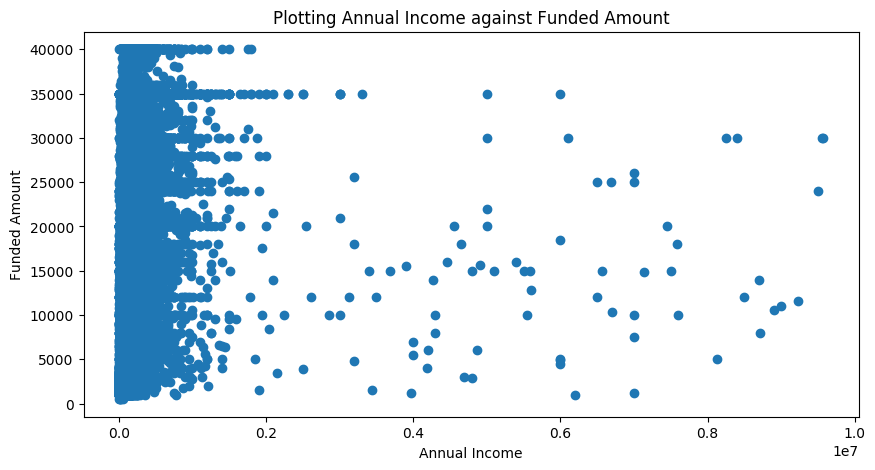

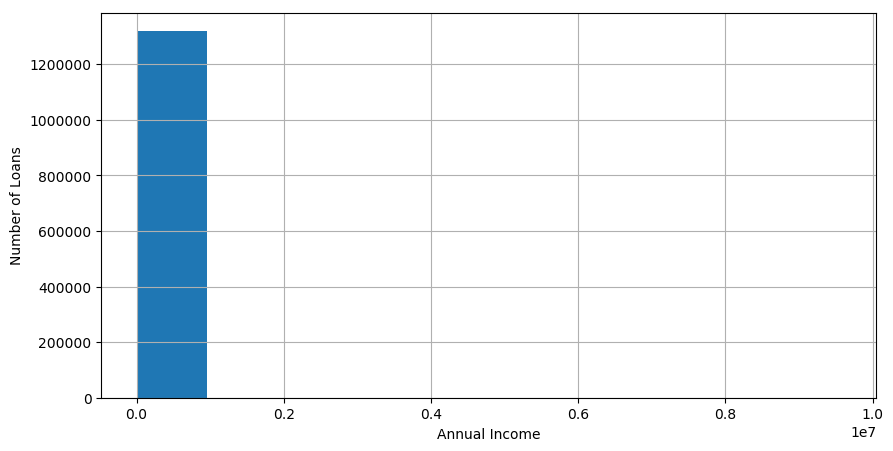

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(df3['annual_inc'], df3['funded_amnt'])
plt.title("Plotting Annual Income against Funded Amount")
plt.ylabel('Funded Amount')
plt.xlabel('Annual Income')
plt.show()

df3.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [20]:
df3 = df3[df3['annual_inc']<150000]

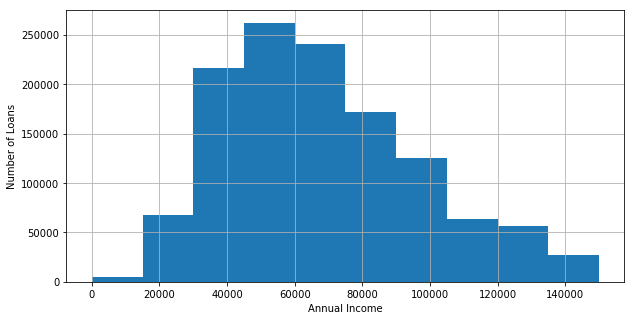

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
%matplotlib inline

df3.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [50]:
df2= pd.DataFrame()
df2 = df3.groupby('annual_inc',as_index=False)['dti','int_rate'].mean()
df2.head(2)

,annual_inc,dti,int_rate
0,0.0,9999.0,14.236441
1,1.0,9999.0,10.528333


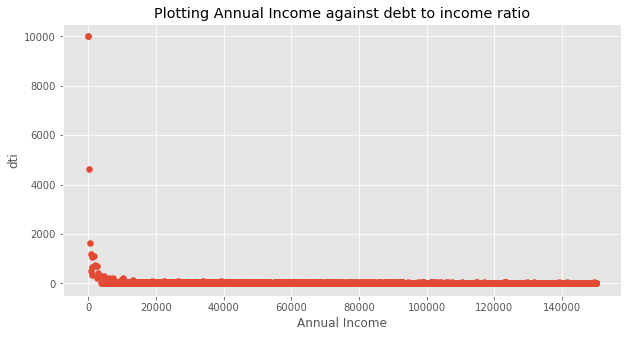

In [51]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(df2['annual_inc'], df2['dti'])
plt.title("Plotting Annual Income against debt to income ratio")
plt.ylabel('dti')
plt.xlabel('Annual Income')
plt.show()




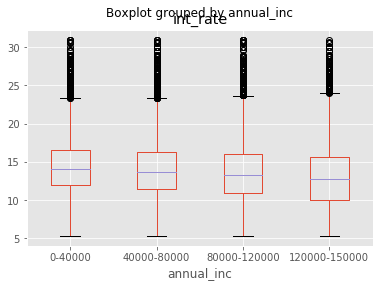

In [45]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

df2['annual_inc'] = pd.qcut(df2['annual_inc'], 4, labels=['0-40000', '40000-80000', '80000-120000', '120000-150000'])
df2.boxplot(column='int_rate', by='annual_inc')



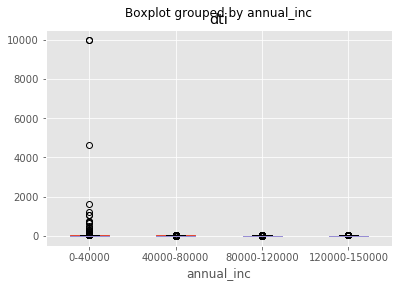

In [48]:
df2['annual_inc'] = pd.qcut(df2['annual_inc'], 4, labels=['0-40000', '40000-80000', '80000-120000', '120000-150000'])
df2.boxplot(column='dti', by='annual_inc')